### Week 2: Demo Bias Variance Tradeoff

The demo covers the change in the bias and variance contributions to the MSE when the model complexity increases/decreases throughn either regularization or dimension reduction. 

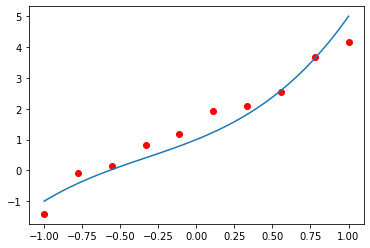

In [13]:
import numpy as np
import matplotlib.pyplot as plt 


# Generating noisy samples from a degree 3 polynomial

xtrain = np.linspace(-1,1,10)

xtest = np.linspace(-1,1, 50)


t = xtrain**3 + xtrain**2 + 2*xtrain + 1

t_test = xtest**3 + xtest**2 + 2*xtest + 1

tnoisy = t.reshape(-1,1) + np.random.normal(0,.4,len(xtrain)).reshape(-1,1)

plt.scatter(xtrain, tnoisy, c='r')
plt.plot(xtest, t_test)
plt.show()


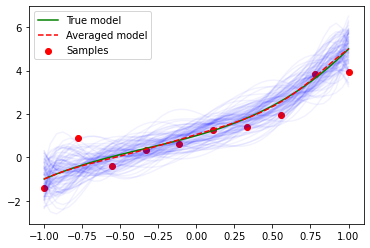

In [15]:
# for 100 XPs, we repeat the following experiment: we generate a 
# different set of noisy samples (x_i, t_i) and learn a degree 7 
# polynomial based on a ridge formulation with very mild level of 
# regularization

numXp = 100
from sklearn.preprocessing import PolynomialFeatures

numfeatures = 7
poly = PolynomialFeatures(numfeatures)

full_beta = np.zeros((numfeatures+1, numXp))


lbda = .0001

for i in range(numXp):
    
    # generating points
    tnoisy = t+np.random.normal(0,.6,len(xtrain))

    # fitting models
    
    
    Xtilde = poly.fit_transform(xtrain.reshape(-1,1))
    
    tmp_inv = np.linalg.inv(np.matmul(Xtilde.T, Xtilde) + lbda*np.eye(np.shape(np.matmul(Xtilde.T, Xtilde))[0]) ) 
    beta = np.matmul(tmp_inv, np.matmul(Xtilde.T, tnoisy))
    
    full_beta[:,i] = beta

    
    
# drawing the plot 

XtildeTest = poly.fit_transform(xtest.reshape(-1,1))

plt.scatter(xtrain, tnoisy, c='r', label = 'Samples')

for i in range(numXp):
    
    plt.plot(xtest, np.matmul(XtildeTest, full_beta[:,i]), c='b', alpha=.05)



plt.plot(xtest, t_test, c='g', label = 'True model')
plt.plot(xtest, np.matmul(XtildeTest, np.mean(full_beta, axis=1)), '--',c = 'r', label = 'Averaged model')

plt.legend()

plt.savefig('biasVariance2.png', dpi=300)


plt.show()


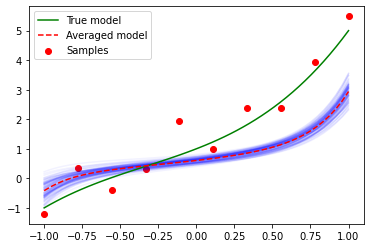

In [16]:
# In order to study the result of a reduction in the model complexity, 
# we start by increasing the level of regularization, 
# setting the lambda to 10. 

numXp = 100
from sklearn.preprocessing import PolynomialFeatures

numfeatures = 7
poly = PolynomialFeatures(numfeatures)

full_beta = np.zeros((numfeatures+1, numXp))


lbda = 10

for i in range(numXp):
    
    # generating points
    tnoisy = t+np.random.normal(0,.6,len(xtrain))

    # fitting models
    
    
    Xtilde = poly.fit_transform(xtrain.reshape(-1,1))
    
    tmp_inv = np.linalg.inv(np.matmul(Xtilde.T, Xtilde) + lbda*np.eye(np.shape(np.matmul(Xtilde.T, Xtilde))[0]) ) 
    beta = np.matmul(tmp_inv, np.matmul(Xtilde.T, tnoisy))
    
    full_beta[:,i] = beta

    
    
# drawing the plot 

XtildeTest = poly.fit_transform(xtest.reshape(-1,1))

plt.scatter(xtrain, tnoisy, c='r', label = 'Samples')

for i in range(numXp):
    
    plt.plot(xtest, np.matmul(XtildeTest, full_beta[:,i]), c='b', alpha=.05)



plt.plot(xtest, t_test, c='g', label = 'True model')
plt.plot(xtest, np.matmul(XtildeTest, np.mean(full_beta, axis=1)), '--',c = 'r', label = 'Averaged model')

plt.legend()

plt.savefig('biasVariance2.png', dpi=300)


plt.show()


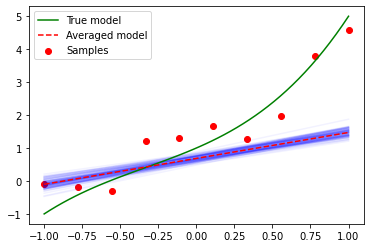

In [17]:
# Finally, we study the effect on the bias and variance of a reduction in 
# the number of features. We repeat the experiments with a simple 
# linear model.  

numXp = 100
from sklearn.preprocessing import PolynomialFeatures

numfeatures = 1
poly = PolynomialFeatures(numfeatures)

full_beta = np.zeros((numfeatures+1, numXp))

for i in range(numXp):
    
    # generating points
    tnoisy = t+np.random.normal(0,.6,len(xtrain))

    # fitting models
    
    
    Xtilde = poly.fit_transform(xtrain.reshape(-1,1))
    
    tmp_inv = np.linalg.inv(np.matmul(Xtilde.T, Xtilde) + lbda*np.eye(np.shape(np.matmul(Xtilde.T, Xtilde))[0]) ) 
    beta = np.matmul(tmp_inv, np.matmul(Xtilde.T, tnoisy))
    
    full_beta[:,i] = beta

    
    
# drawing the plot 

XtildeTest = poly.fit_transform(xtest.reshape(-1,1))

plt.scatter(xtrain, tnoisy, c='r', label = 'Samples')

for i in range(numXp):
    
    plt.plot(xtest, np.matmul(XtildeTest, full_beta[:,i]), c='b', alpha=.05)


plt.plot(xtest, t_test, c='g', label = 'True model')
plt.plot(xtest, np.matmul(XtildeTest, np.mean(full_beta, axis=1)), '--',c = 'r', label = 'Averaged model')
plt.legend()

plt.savefig('biasVariance4.png', dpi=300)


plt.show()
